<img src="https://raw.githubusercontent.com/Paulodiastst/Curso_EBAC-Profissao_Cientista_de_Dados/main/Cientista%20de%20Dados/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Módulo 12** | Regressão I | Exercício 1

Aluno [Paulo Roberto](https://www.linkedin.com/in/paulo-roberto/)<br>
Data: 27 de outubro de 2024.

---

# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset

import statsmodels.formula.api as smf

from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
reg_tip = smf.ols('tip ~ net_bill', 
              data = tips
              ).fit()

reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           5.02e-23
Time:                        21:59:08   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(tips.describe())


Estatísticas descritivas:
       total_bill         tip        size     tip_pct    net_bill
count  244.000000  244.000000  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672    0.202123   16.787664
std      8.902412    1.383638    0.951100    0.163385    8.032459
min      3.070000    1.000000    1.000000    0.036955    2.070000
25%     13.347500    2.000000    2.000000    0.148274   11.000000
50%     17.795000    2.900000    2.000000    0.183110   14.555000
75%     24.127500    3.562500    3.000000    0.236821   20.685000
max     50.810000   10.000000    6.000000    2.452381   43.170000


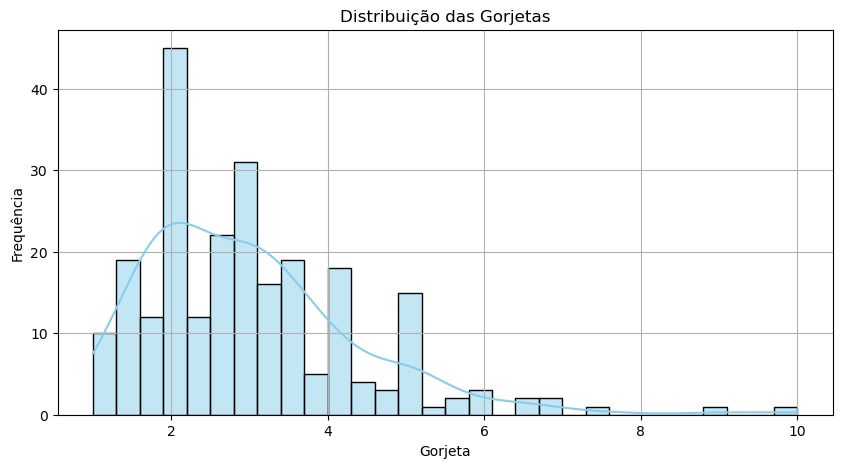

In [5]:
# Visualização da distribuição das gorjetas
plt.figure(figsize=(10, 5))
sns.histplot(tips['tip'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição das Gorjetas')
plt.xlabel('Gorjeta')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

C:\Users\Paulo Roberto\AppData\Local\Temp\ipykernel_9412\1009263001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='tip', data=tips, palette='Set3')


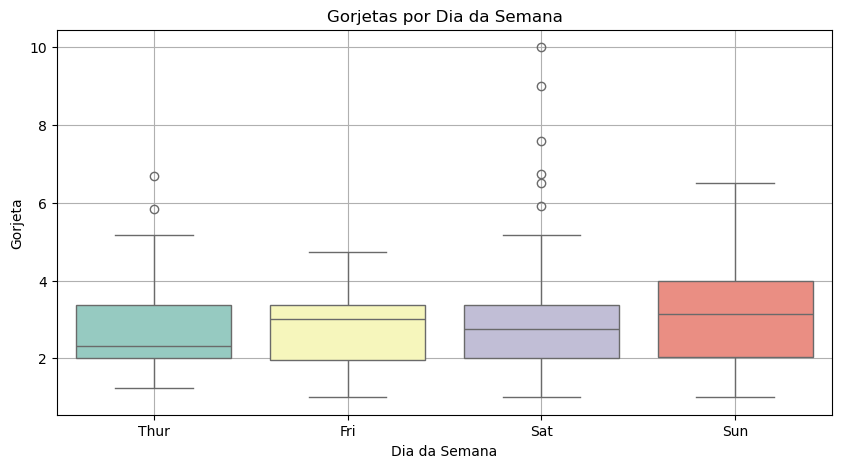

In [6]:
# Análise de gorjetas por dia da semana
plt.figure(figsize=(10, 5))
sns.boxplot(x='day', y='tip', data=tips, palette='Set3')
plt.title('Gorjetas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Gorjeta')
plt.grid(True)
plt.show()

In [7]:
# Análise da média da gorjeta por dia da semana
mean_tips_by_day = tips.groupby('day')['tip'].mean().reset_index()
print("\nMédia das gorjetas por dia da semana:")
print(mean_tips_by_day)


Média das gorjetas por dia da semana:
    day       tip
0  Thur  2.771452
1   Fri  2.734737
2   Sat  2.993103
3   Sun  3.255132


C:\Users\Paulo Roberto\AppData\Local\Temp\ipykernel_9412\3235687901.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_tips_by_day = tips.groupby('day')['tip'].mean().reset_index()


In [8]:
tips['tip_predict'] = round(reg_tip.predict(tips),2)
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,tip_predict
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,2.92
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,2.19
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,3.07
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,3.35
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,3.41
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,3.63
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,3.83
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,3.38
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,2.93


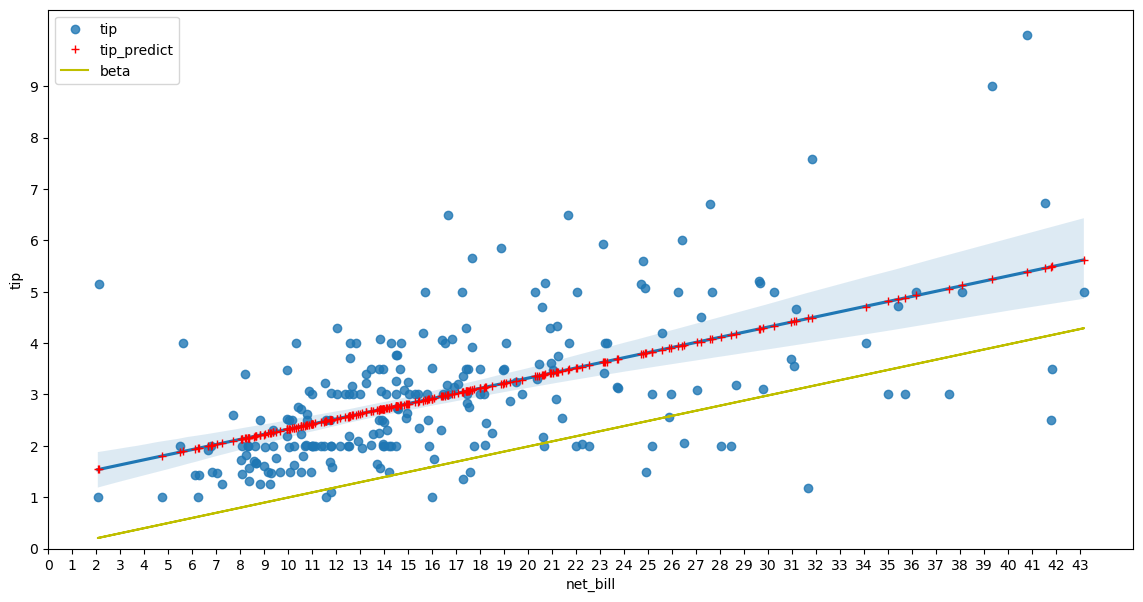

In [9]:
# Gráfico de dispersão entre total_bill e tip
plt.figure(figsize=(14,7))

sns.regplot(x='net_bill', y='tip', data=tips, label='tip')

plt.plot(tips['net_bill'], tips['tip_predict'], 'r+', label='tip_predict')

x = tips['net_bill']
y = x * reg_tip.params.net_bill
plt.plot(x, y, '-y', label='beta')

plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xticks(ticks=np.arange(stop=tips['net_bill'].max(), step=1))
plt.yticks(ticks=np.arange(stop=tips['tip'].max(), step=1))

plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [10]:
reg_tip_pct = smf.ols(formula='tip_pct ~ net_bill', 
                      data=tips
                     ).fit()

reg_tip_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           1.52e-06
Time:                        21:59:09   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
tips['tip_pct_predict'] = reg_tip_pct.predict(tips)

In [12]:
tips[['net_bill','tip','tip_predict','tip_pct','tip_pct_predict']]

,net_bill,tip,tip_predict,tip_pct,tip_pct_predict
0,15.98,1.01,2.92,0.063204,0.207087
1,8.68,1.66,2.19,0.191244,0.251951
2,17.51,3.50,3.07,0.199886,0.197684
3,20.37,3.31,3.35,0.162494,0.180107
4,20.98,3.61,3.41,0.172069,0.176358
...,...,...,...,...,...
239,23.11,5.92,3.63,0.256166,0.163268
240,25.18,2.00,3.83,0.079428,0.150546
241,20.67,2.00,3.38,0.096759,0.178264
242,16.07,1.75,2.93,0.108899,0.206534


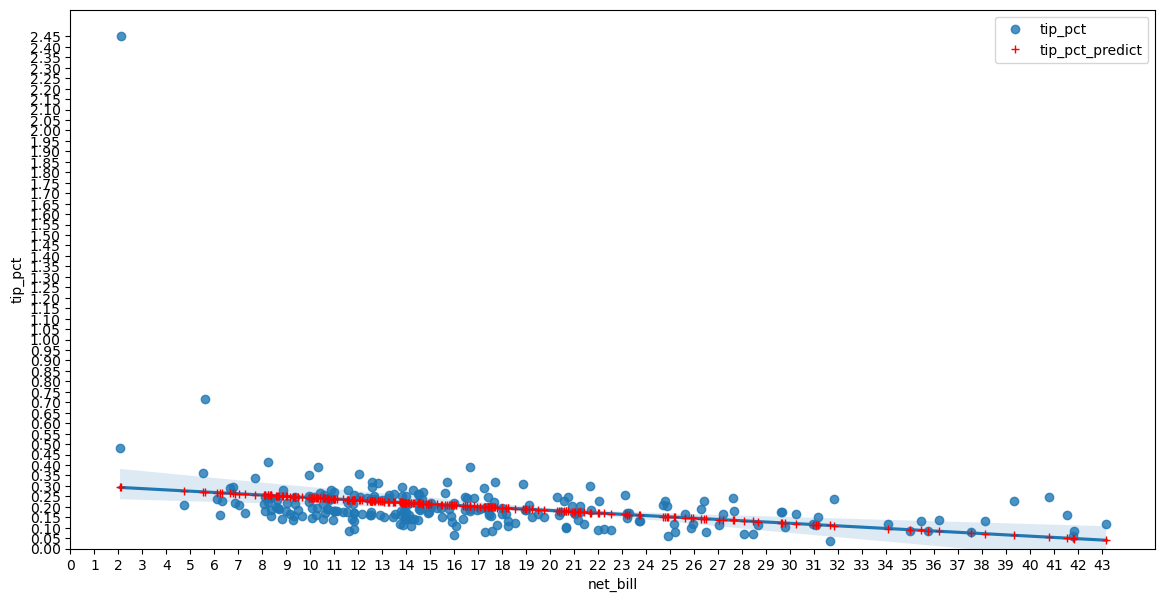

In [13]:
plt.figure(figsize=(14,7))

sns.regplot(x='net_bill', y='tip_pct', data=tips, label='tip_pct')
plt.plot(tips['net_bill'], tips['tip_pct_predict'], 'r+', label='tip_pct_predict')

plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xticks(ticks=np.arange(stop=tips['net_bill'].max(), step=1))
plt.yticks(ticks=np.arange(stop=tips['tip_pct'].max(), step=.05))

plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

### Conclusão:

Os dois gráficos mostram diferentes aspectos das gorjetas em relação ao total da conta e à conta líquida. A relação entre a gorjeta e a conta total tende a ser mais forte e linear, enquanto a relação entre a porcentagem da gorjeta e a conta líquida pode ser mais complexa e menos previsível. Portanto, enquanto os $R^2$s podem ser comparados, deve-se considerar que cada um reflete a adequação do modelo para diferentes contextos e variáveis. Comparações diretas devem levar em conta o que cada variável representa e como elas se comportam no conjunto de dados.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [14]:
# Valores preditos da porcentagem da gorjeta multiplicados pela conta líquida
predicted_tips = reg_tip_pct.fittedvalues * tips['net_bill']

In [15]:
# Cálculo do coeficiente de determinação (𝑅²)
r2 = r2_score(y_true=tips['tip'], y_pred=predicted_tips)

In [16]:
# Impressão dos resultados
print("Coeficiente de determinação (𝑅²) do modelo para tip:", round(r2, 4))
print(f'Coeficiente de determinação (𝑅²) dos valores preditos para "tip" (tip_pct * net_bill): {round(r2 * 100, 2)}%')

Coeficiente de determinação (𝑅²) do modelo para tip: 0.1089
Coeficiente de determinação (𝑅²) dos valores preditos para "tip" (tip_pct * net_bill): 10.89%


In [17]:
# Coeficientes de determinação dos modelos
print(f'Coeficiente de determinação (𝑅²) do modelo "reg_tip": {round(reg_tip.rsquared * 100, 2)}%')
print(f'Coeficiente de determinação (𝑅²) do modelo "reg_tip_pct": {round(reg_tip_pct.rsquared * 100, 2)}%')

Coeficiente de determinação (𝑅²) do modelo "reg_tip": 33.25%
Coeficiente de determinação (𝑅²) do modelo "reg_tip_pct": 9.13%
